In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import math

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(200_000)
    else:
        demand.append(1_000_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
# Terminal_calcs=[]
# stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
# fuel_costs = [0.1, 0.5, 1, 2]
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for crane in stack_cranes:   
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                                              lifecycle = lifecycle, 
#                                              elements = demand + vessels, 
#                                              operational_hours = 7665,   # example Wijnand
#                                              debug=False,
#                                              stack_equipment = crane,
#                                              laden_stack = crane) 
#     NPV=Terminal_dummy.simulate()
#     Terminal_calcs.append(NPV)
# print(Terminal_calcs)


In [6]:
# def chunkIt(seq, num):
#     avg = len(seq) / float(num)
#     out = []
#     last = 0.0

#     while last < len(seq):
#         out.append(seq[int(last):int(last + avg)])
#         last += avg

#     return out

In [7]:
# Terminal_calcs=[]
# stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
# fuel_costs = [0.1, 0.5, 1, 2]
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']

# for crane in stack_cranes:
#     for i in fuel_costs: 
#         Terminal_dummy = container_system.System(startyear = startyear, 
#                                                  lifecycle = lifecycle, 
#                                                  elements = demand + vessels, 
#                                                  operational_hours = 7665,   # example Wijnand
#                                                  debug=False,
#                                                  stack_equipment = crane,
#                                                  laden_stack = crane,
#                                                  fuel_price = i ) 
#         NPV=Terminal_dummy.simulate()
#         Terminal_calcs.append(NPV)
# print(Terminal_calcs)


In [8]:
# out=chunkIt(Terminal_calcs, len(fuel_costs))

# rmg=out[0]
# rtg=out[1]
# sc=out[2]
# rs=out[3]
# print(rmg)

# ind = np.arange(4)  # the x locations for the groups
# width = 0.1       # the width of the bars


# fig, ax = plt.subplots(figsize=(16, 7))
# ax.bar(ind, rmg, width = width, label ="RMG")
# ax.bar(ind+width, rtg, width = width, label="RTG")
# ax.bar(ind+2*width, sc, width = width, label="Straddle carrier")
# ax.bar(ind+3*width, rs, width = width, label="Reach stacker")
# ax.set_xticks(ind+3*width/3)
# ax.set_xticklabels(('very low', 'low', 'mid', 'high'))
# plt.ylabel('Net present value')
# plt.xlabel('Fuel price')
# plt.legend()
# ax.set_title('NPV per equipment for varying fuel price')
# plt.show()
# plt.savefig('C:/Users/908538/Google Drive/Afstuderen/02. Model/Masterfile/Plots/fuel.png', dpi=400)


In [9]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7350,  
                         debug=False,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [10]:
Terminal.simulate()

nan

## Report all elements

In [11]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year   volume
0  2020   200000
1  2021   200000
2  2022   200000
3  2023   200000
4  2024   200000
5  2025   200000
6  2026  1000000
7  2027  1000000
8  2028  1000000
9  2029  1000000, 'handling_fee': 150, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': '712b1170-7b0d-11e9-982f-7c76353a4af7'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '712c9810-7b0d-11e9-8870-7c76353a4af7'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': '712c9811-7b0d-11e9-b514-7c76353a4af7'}

Panamax_1

{'type': 'Panamax', 'call_size': 3000, 'LOA': 290, 'draft': 13, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 31, 'mooring

{'land_use': 6609.6, 'triggers': [], 'capex': 17667596, 'labour': [], 'maintenance': 165240, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'mobilisation': 25000, 'maintenance_perc': 0.1, 'width': 6, 'height': 5, 'length': 30, 'capacity': 900, 'gross_tgs': 18, 'area_factor': 2.04, 'pavement': 200, 'drainage': 50, 'household': 0.1, 'digout_margin': 1.2, 'reefer_factor': 2.33, 'consumption': 4, 'reefer_rack': 3500, 'reefers_present': 0.5, 'year_purchase': [], 'year_online': 2027, 'name': 'RTG Stack', 'id': '71605244-7b0d-11e9-8b04-7c76353a4af7', 'df':    year       capex  maintenance         energy
0  2020         0.0          0.0       0.000000
1  2021         0.0          0.0       0.000000
2  2022         0.0          0.0       0.000000
3  2023         0.0          0.0       0.000000
4  2024         0.0          0.0       0.000000
5  2025         0.0          0.0       0.000

{'triggers': [], 'labour': 125000, 'maintenance': 10000.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 505000, 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2027, 'name': 'Empty Handler', 'id': '717dc555-7b0d-11e9-b7da-7c76353a4af7', 'shift': 5, 'df':    year     capex  maintenance    labour         fuel
0  2020       0.0          0.0       0.0     0.000000
1  2021       0.0          0.0       0.0     0.000000
2  2022       0.0          0.0       0.0     0.000000
3  2023       0.0          0.0       0.0     0.000000
4  2024       0.0          0.0       0.0     0.000000
5  2025       0.0          0.0       0.0     0.000000
6  2026  505000.0          0.0       0.0     0.000000
7  2027       0.0      10000.0  125000.0

{'triggers': [], 'labour': 125000, 'maintenance': 8500.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'non_essential_moves': 1.2, 'year_purchase': [], 'year_online': 2028, 'name': 'Tractor-trailer', 'id': '71c18510-7b0d-11e9-b9f3-7c76353a4af7', 'shift': 5, 'df':    year    capex  maintenance    labour          fuel
0  2020      0.0          0.0       0.0      0.000000
1  2021      0.0          0.0       0.0      0.000000
2  2022      0.0          0.0       0.0      0.000000
3  2023      0.0          0.0       0.0      0.000000
4  2024      0.0          0.0       0.0      0.000000
5  2025      0.0          0.0       0.0      0.000000
6  20

In [12]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

   year        capex  maintenance   insurance        energy      labour  \
0  2020   16195584.0         0.00        0.00  0.000000e+00         NaN   
1  2021   89655825.0         0.00        0.00  0.000000e+00         NaN   
2  2022          0.0   2478731.40   318726.40  1.869417e+06   4292500.0   
3  2023          0.0   2478731.40   318726.40  1.869417e+06   4292500.0   
4  2024          0.0   2478731.40   318726.40  1.869417e+06   4292500.0   
5  2025          0.0   2478731.40   318726.40  1.869417e+06   4292500.0   
6  2026  293460109.4   2478731.40   318726.40  4.882964e+06   5772500.0   
7  2027   44036145.6   8489511.40   618726.40  4.905370e+06  15210000.0   
8  2028          0.0  10054426.92  1058641.92  4.908818e+06  18585000.0   
9  2029          0.0  10054426.92  1058641.92  4.908818e+06  18585000.0   

           fuel     demurrage   revenues  
0  0.000000e+00  0.000000e+00          0  
1  0.000000e+00  0.000000e+00          0  
2  6.016963e+05  0.000000e+00   30000000  
3 

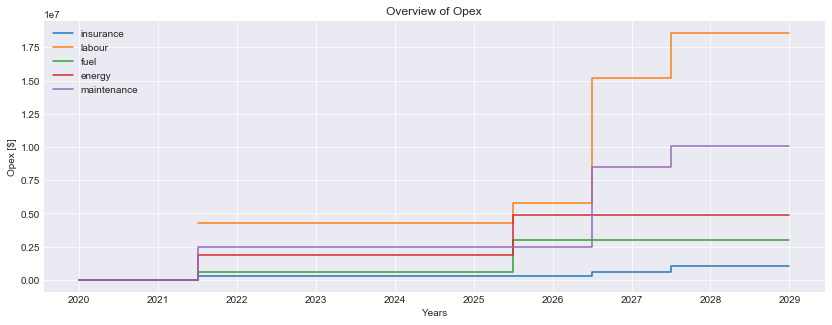

In [13]:
Terminal.opex_plot(cash_flows)

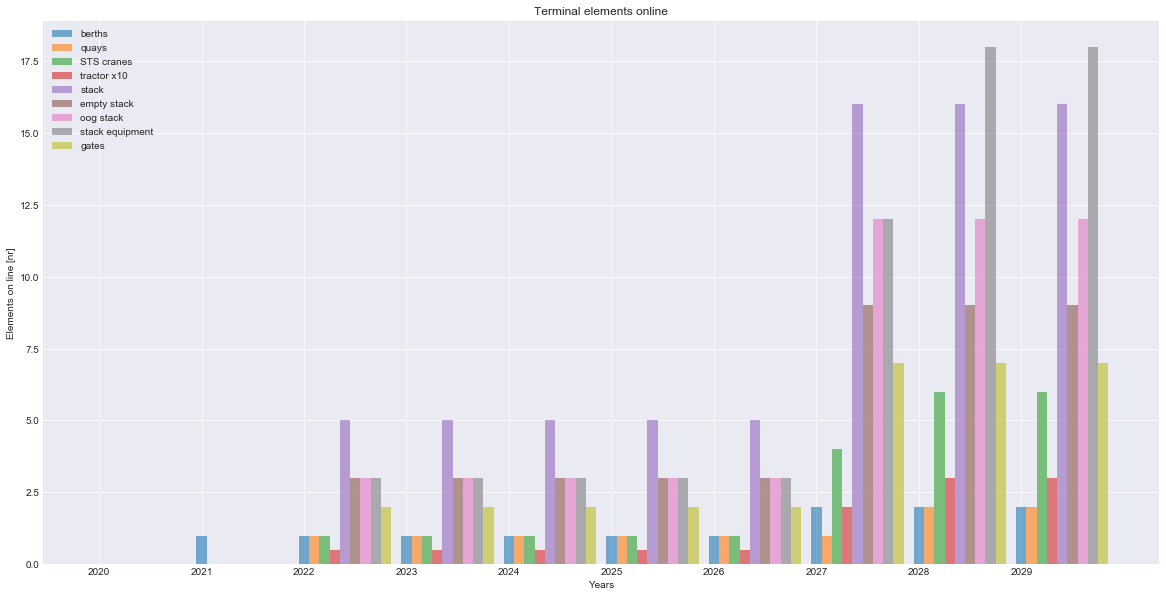

In [14]:
Terminal.terminal_elements_plot()

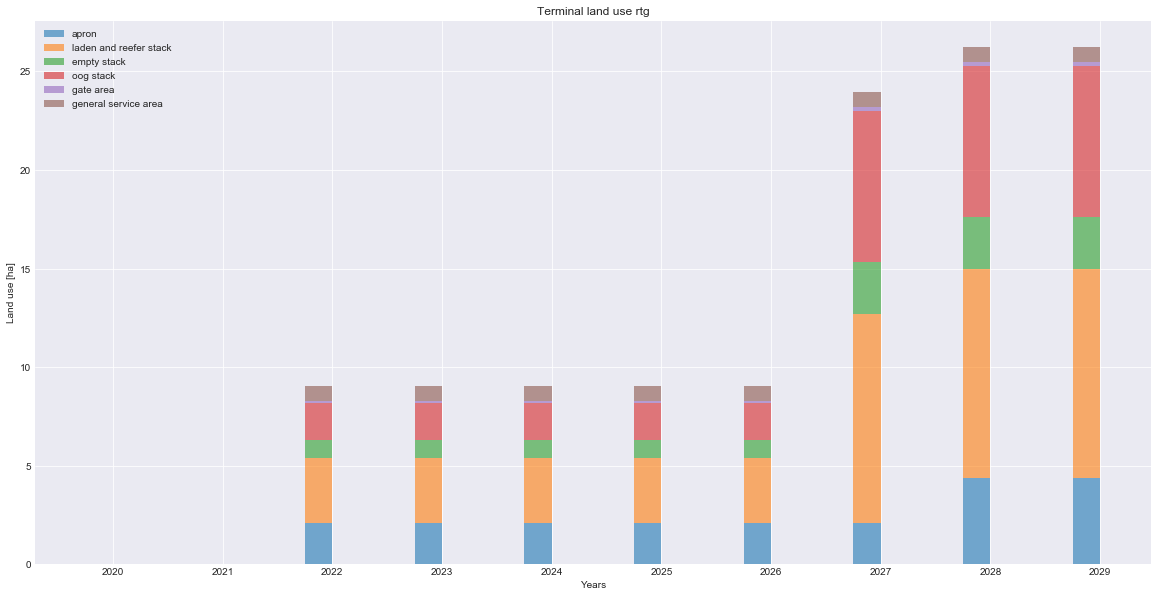

In [15]:
Terminal.land_use_plot()

In [16]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

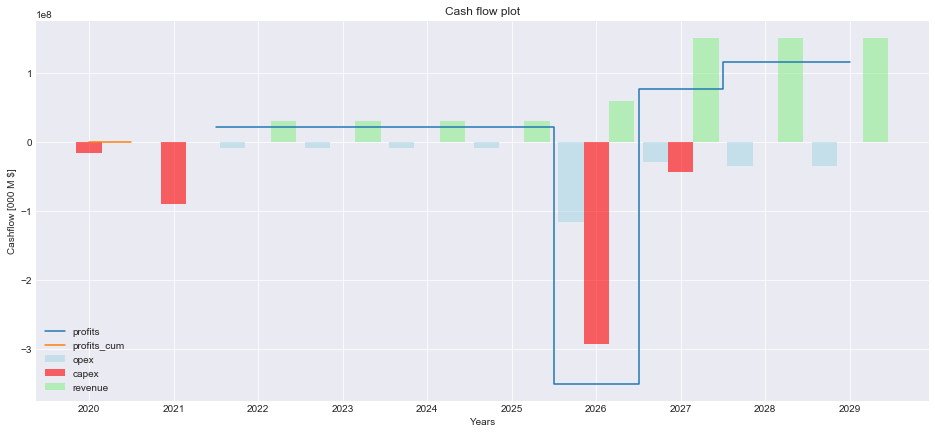

In [17]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [18]:
Terminal.NPV()

nan